In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

year = 1995

1. Объединить 2 датасета:
Из первого получить данные [1994, 2002], из второго [2002, 2014] 

In [20]:
first_dataset = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv")
second_dataset = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv")

full_data = pd.concat([first_dataset, second_dataset])

first_dataset_years = first_dataset.loc[((first_dataset['year'] == 1994) | (first_dataset['year' ] == 2002))]
second_dataset_years = second_dataset.loc[((second_dataset['year'] == 2002) | (second_dataset['year' ] == 2014))]

years_data = pd.concat([first_dataset_years, second_dataset_years])

2. Создать столбец содержащий дату в следующем формате:
31-12-2014

In [ ]:
# 06.12.2022 костыль блинб какой-то - исправь 
# 13.12.2022 сам исправь раз умный такой
date = pd.to_datetime(years_data['date_of_month'].astype(str) + "-" + years_data['month'].astype(str) + "-" + years_data['year'].astype(str), dayfirst=True)
years_data.insert(1, "date", date.dt.strftime('%d-%m-%Y'))
years_data.head()

,year,date,month,date_of_month,day_of_week,births
0,1994,01-01-1994,1,1,6,8096
1,1994,02-01-1994,1,2,7,7772
2,1994,03-01-1994,1,3,1,10142
3,1994,04-01-1994,1,4,2,11248
4,1994,05-01-1994,1,5,3,11053


3. Построить линейный график рождаемости за год (год соответствует вашему варианту):
- по месяцам
- по неделям

<AxesSubplot: xlabel='month', ylabel='births'>

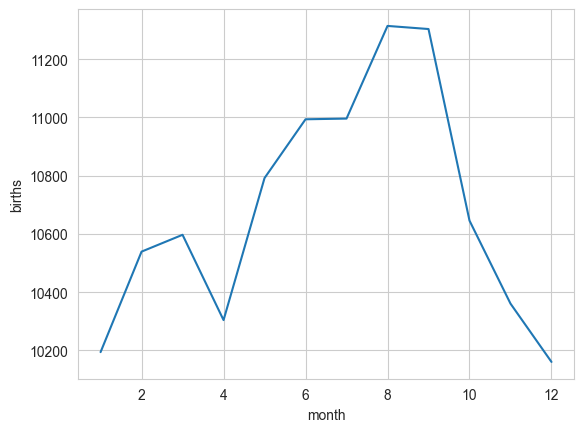

In [22]:
year_data = full_data.loc[full_data['year'] == year]
# 06.12.2022 сделай потом палитру норм а то цвета повторяются
# 13.12.2022 сам сделай я устал за сегодня а сдавать это завтра
color = sns.color_palette()
sns.set_style("whitegrid")
sns.lineplot(data=year_data, x="month", y="births", errorbar=None)

In [27]:
# 06.12.2022 потом когда-нибудь сделаю
# 13.12.2022 потом когда-нибудь сделаю

4. Сравнить рождаемость с помощью колоночной диаграммы за первый и последний месяц года (год соответствует вашему варианту)

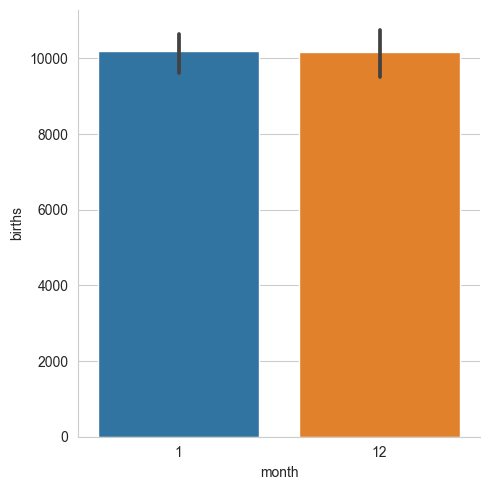

In [24]:
month_data = year_data.loc[(year_data['month'] == 1) | (year_data['month' ] == 12)]
sns.catplot(data=month_data, x="month", y="births", kind="bar")

5. Сделать сравнительный линейный график рождаемости за каждый день по месяцам года (год соответсвует вашему варианту)

C:\Users\lio58\AppData\Local\Temp\ipykernel_8064\2097892730.py:1: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=year_data, x="date_of_month", y="births", hue="month", palette=color, errorbar=None)


<AxesSubplot: xlabel='date_of_month', ylabel='births'>

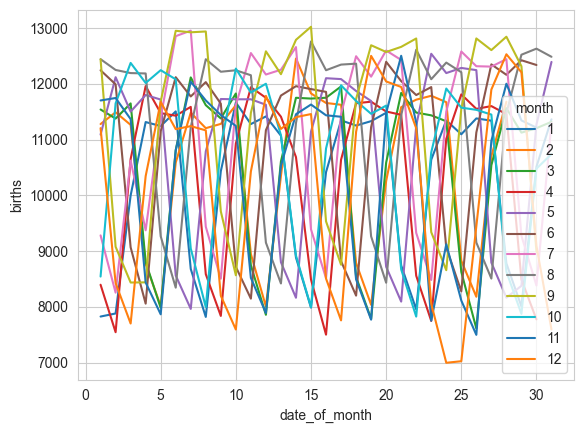

In [25]:
sns.lineplot(data=year_data, x="date_of_month", y="births", hue="month", palette=color, errorbar=None)

6. Сделать сравнительный линейный график рождаемости за каждый месяц по всем годам

C:\Users\lio58\AppData\Local\Temp\ipykernel_8064\2729159826.py:2: UserWarning: 
The palette list has fewer values (10) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=full_data, x="date_of_month", y="births", hue="year", palette=color, errorbar=None)


<AxesSubplot: xlabel='date_of_month', ylabel='births'>

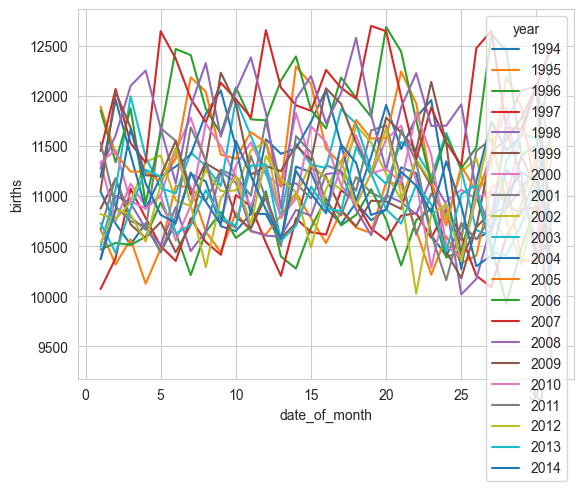

In [26]:
sns.lineplot(data=full_data, x="month", y="births", hue="year", palette=color, errorbar=None)